# Práctica 3 - Clasificación Jerárquica
## OPCIÓN 2: Comparación de métodos
Seleccione al menos dos algoritmos de los disponibles en la bibliotecas indicadas. Seleccione al menos tres problemas
de clasificación jerárquica de los repositorios indicados.
Realice las siguientes tareas:
1. Aplique los algoritmos seleccionados a los datasets
2. Compare los resultados y explique qué conclusiones se podrían obtener

Utilizaremos los datasets de:
- Large Scale Hierarchical Text Classification: https://www.kaggle.com/competitions/lshtc/data
- mips (https://github.com/geantrindade/TEsHierarchicalDatasets/tree/master/arff)
- repbase (https://github.com/geantrindade/TEsHierarchicalDatasets/tree/master/arff

Para los algoritmos de clasificación jerárquica usaremos la biblioteca https://github.com/scikit-learn-contrib/hiclass donde se implementan algoritmos de clasificación jerárquica.

https://hiclass.readthedocs.io/en/latest/algorithms/index.html

> Miranda, F.M., Köehnecke, N. and Renard, B.Y. (2023) 'HiClass: a Python Library for Local Hierarchical Classification Compatible with Scikit-learn', Journal of Machine Learning Research, 24(29), pp. 1–17. Available at: https://jmlr.org/papers/v24/21-1518.html.



In [ ]:
!pip install hiclass # Instalación de la biblioteca hiclass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


## Carga de los datasets

## LSHTC

Sube el .json de Kaggle

In [ ]:
from google.colab import files
files.upload()  # Esto abrirá un diálogo para que subas tu archivo `kaggle.json`

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"albertofm","key":"010bf1733de6e6d3233ae6d20b2c6253"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c lshtc

100% 641M/642M [00:08<00:00, 91.5MB/s]
100% 642M/642M [00:08<00:00, 76.7MB/s]


In [ ]:
!unzip lshtc.zip -d lshtc_data
# Descomprimimos los ficheros test-remapped y train-remapped
!unzip lshtc_data/test-remapped.zip -d lshtc_data/test-remapped
!unzip lshtc_data/train-remapped.zip -d lshtc_data/train-remapped

Archive:  lshtc.zip
  inflating: lshtc_data/AllZerosBenchmark.zip  
  inflating: lshtc_data/hierarchy.zip  
  inflating: lshtc_data/knn-baseline.tar.gz  
  inflating: lshtc_data/test-remapped.zip  
  inflating: lshtc_data/test.zip     
  inflating: lshtc_data/train-remapped.zip  
  inflating: lshtc_data/train.zip    
Archive:  lshtc_data/test-remapped.zip
  inflating: lshtc_data/test-remapped/test-remapped.csv  
Archive:  lshtc_data/train-remapped.zip
  inflating: lshtc_data/train-remapped/train-remapped.csv  


In [ ]:
!unzip lshtc_data/hierarchy.zip -d lshtc_data/hierarchy

Archive:  lshtc_data/hierarchy.zip
  inflating: lshtc_data/hierarchy/hierarchy.txt  


In [ ]:
!head -n 1000 lshtc_data/train-remapped/train-remapped.csv > lshtc_data/train-remapped/train-remapped-1K.csv

In [ ]:
import pandas as pd
import gc

# Leer el archivo
with open('lshtc_data/train-remapped/train-remapped-1K.csv', 'r') as file:
    lines = file.readlines()

# Lista para almacenar las características, etiquetas y un diccionario para cada fila
data = []
labels = []

# Procesar cada línea del archivo
for id, line in enumerate(lines[1:]):  # Saltar encabezado si existe
    line = line.strip()  # Eliminar espacios en blanco
    if not line:  # Ignorar líneas vacías
        continue

    # Dividir la línea en etiquetas y características
    parts = line.split()

    # Eliminar las comas de las etiquetas
    for i in range(len(parts)):
        if ',' in parts[i]:
            parts[i] = parts[i].replace(',', '')

    # Lista para las etiquetas
    lista_etiquetas = []
    # Diccionario para las características
    row_data = {}

    for part in parts:
        if ':' not in part:
            # Si no tiene : entonces es una etiqueta
            lista_etiquetas.append(int(part))
        else:
            # Si tiene : es una feature:value
            index, value = part.split(':')
            row_data[int(index)] = float(value)

    # Agregar las características (features) y las etiquetas a las listas
    data.append(row_data)
    labels.append(lista_etiquetas)

    # Liberar memoria periódicamente
    if id % 10000 == 0:  # Liberar cada 10,000 líneas procesadas
        gc.collect()

# Crear el DataFrame con las características
df_features = pd.DataFrame(data)

# Asegurarse de que todas las filas tengan la misma longitud (rellenar con NaN si es necesario)
df_features = df_features.fillna(0)

# Agregar la columna de etiquetas (como lista de clases)
df_features['labels'] = labels

# Liberar memoria final
gc.collect()

# Mostrar las primeras filas del DataFrame
print(df_features.head())


     1    2    3    4    5    6    7    8    9   10  ...  15111  15112  15113  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   15114  15115  15116  15117  15118  15119  \
0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0   

                                              labels  
0            [314523, 165538, 76255, 335416, 416827]  
1                    [410523, 230296, 368303, 75145]  
2  [21631, 183296, 131834, 163541, 9372, 394318, ...  
3         

In [ ]:
df_features

,1,2,3,4,5,6,7,8,9,10,...,15111,15112,15113,15114,15115,15116,15117,15118,15119,labels
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[314523, 165538, 76255, 335416, 416827]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[410523, 230296, 368303, 75145]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[21631, 183296, 131834, 163541, 9372, 394318, ..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[33692, 13402, 336776, 89487, 393382]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[372742, 97455, 239629]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[132086]
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[128172, 282962, 112382, 243572]"
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[379689, 405539]"
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[316360, 345454, 120018, 379063, 308111, 143928]"


In [ ]:
# Inicializar el diccionario de jerarquía
hierarchy = {}

# Leer el archivo 'hierarchy.txt'
with open('lshtc_data/hierarchy/hierarchy.txt', 'r') as file:
    for line in file:
        parent, child = map(int, line.strip().split())  # Convertir a enteros
        if parent not in hierarchy:
            hierarchy[parent] = []  # Si el padre no está en el diccionario, creamos una lista
        hierarchy[parent].append(child)  # Agregamos el hijo a la lista del padre

# Verificar las primeras relaciones (padre-hijo)
print(list(hierarchy.items())[:5])  # Mostrar las primeras 5 relaciones para comprobar

# Crear el diccionario inverso (de hijo a padres)
inverse_hierarchy = {}
for parent, children in hierarchy.items():
    for child in children:
        if child not in inverse_hierarchy:
            inverse_hierarchy[child] = []
        inverse_hierarchy[child].append(parent)

# Verificar el diccionario inverso
print(list(inverse_hierarchy.items())[:5])



[(2244783, [2214730, 407360, 303720, 340621, 147032, 93332, 70333, 311953, 233436, 2436777, 266217, 2212847, 313387, 213318, 281518, 25758, 149988, 410868, 82159, 244783]), (2290533, [2150070, 2304330, 2091830, 90670, 1056690, 1002001, 2082911, 2253432, 2013402, 2027483, 1012423, 2150783, 2182704, 2076974, 2144164, 2244187, 2174397, 2198098, 290533]), (2396640, [73420, 211790, 396640]), (2339034, [73420, 211790, 2292749, 339034]), (2110932, [139100, 112720, 386530, 301580, 194250, 318560, 288870, 133270, 141870, 213480, 289710, 66000, 194990, 133870, 334140, 144600, 396371, 298531, 423081, 43191, 305221, 308061, 225051, 375931, 428251, 367991, 332732, 201532, 223962, 109152, 126302, 42922, 260792, 257342, 376892, 432593, 3413, 136343, 133753, 436293, 53763, 322153, 276743, 364223, 376173, 76193, 419644, 208864, 243834, 377424, 134214, 432694, 228914, 138524, 167474, 93474, 360184, 2173784, 124404, 200204, 323624, 2250085, 332845, 120215, 177275, 69135, 436705, 100695, 389325, 2241646, 

In [ ]:
# Convertir todas las listas de valores del diccionario 'hierarchy' en un conjunto
valid_labels = set(label for sublist in hierarchy.values() for label in sublist)

# Filtrar las clases que no están en el conjunto de 'valid_labels'
missing_classes = [label for label_list in df_features['labels'] for label in label_list if label not in valid_labels]

print(f"Clases faltantes en la jerarquia: {missing_classes}")
# Verificar que todas las clases (elementos de las listas) en df_features estén en la jerarquía inversa
missing_classes_inverse = [label for label_list in df_features['labels'] for label in label_list if label not in inverse_hierarchy]
print("Clases faltantes en la jerarquía inversa:", missing_classes_inverse)


Clases faltantes en la jerarquia: []
Clases faltantes en la jerarquía inversa: []


In [ ]:
# Precomputamos las relaciones padre-hijo
parents_dict = {}
children_dict = {}

# Llenamos los diccionarios de padres y hijos
for parent, children in hierarchy.items():
    if parent not in children_dict:
        children_dict[parent] = []  # Inicializamos la lista de hijos si no existe
    for child in children:
        if child not in parents_dict:
            parents_dict[child] = []
        parents_dict[child].append(parent)

        if child not in children_dict:
            children_dict[child] = []  # Inicializamos la lista de hijos si no existe
        children_dict[child].append(child)  # Aquí debería añadir el mismo hijo a sí mismo

# Ahora podemos crear las columnas 'parents' y 'childrens' de manera eficiente

# Crear columna 'parents' con una lista de listas para cada etiqueta
df_features['parents'] = df_features['labels'].apply(
    lambda label_list: [
        [parent for parent in parents_dict.get(label, [])] for label in label_list
    ]
)

# Crear columna 'childrens' con una lista de listas para cada etiqueta
df_features['childrens'] = df_features['labels'].apply(
    lambda label_list: [
        [child for child in children_dict.get(label, []) if child != label] for label in label_list
    ]
)



In [ ]:
# Las etiquetas no tienen hijos porque son nodos hoja (clases finales de la clasificacion)
df_features

,1,2,3,4,5,6,7,8,9,10,...,15113,15114,15115,15116,15117,15118,15119,labels,parents,childrens
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[314523, 165538, 76255, 335416, 416827]","[[2314523], [2165538], [2076255], [2208413, 21...","[[], [], [], [], []]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[410523, 230296, 368303, 75145]","[[2410523], [2230296], [2368303], [2075145]]","[[], [], [], []]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[21631, 183296, 131834, 163541, 9372, 394318, ...","[[2057841, 2298863], [1007378, 2216699], [2131...","[[], [], [], [], [], [], []]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[33692, 13402, 336776, 89487, 393382]","[[2033692], [2013402], [2336776], [2089487], [...","[[], [], [], [], []]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[372742, 97455, 239629]","[[2372742], [2097455], [2159077, 2147755]]","[[], [], []]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[132086],[[2132086]],[[]]
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[128172, 282962, 112382, 243572]","[[2128172], [1012192, 2370256, 2150462, 226557...","[[], [], [], []]"
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[379689, 405539]","[[1029110, 2422527], [2405539]]","[[], []]"
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[316360, 345454, 120018, 379063, 308111, 143928]","[[2316360], [2120018, 1062825], [2120018], [23...","[[], [], [], [], [], []]"


## MIPS


In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=e8839067033fa908938bf56342287ed16d3fa4e8566c9cead4bd9c8679fd5adc
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
# Descargamos los datos de github
import requests

# URLs de los archivos raw
url_train = "https://raw.githubusercontent.com/geantrindade/TEsHierarchicalDatasets/master/arff/mips1trainatt.arff"
url_test = "https://raw.githubusercontent.com/geantrindade/TEsHierarchicalDatasets/master/arff/mips1testatt.arff"

# Descargar los archivos
response_train = requests.get(url_train)
response_test = requests.get(url_test)

# Guardar los archivos en el sistema
with open("mips1trainatt.arff", "wb") as f:
    f.write(response_train.content)

with open("mips1testatt.arff", "wb") as f:
    f.write(response_test.content)

print("Archivos descargados correctamente.")


Archivos descargados correctamente.


In [ ]:
import re
from scipy.io import arff
import pandas as pd

def preprocess_arff(file_path, output_path):
    with open(file_path, 'r') as fp:
        lines = fp.readlines()

    updated_lines = []
    for line in lines:
        if line.startswith('@attribute classification hierarchical'):
            # Extraer las clases y formatearlas como una enumeración compatible
            classes = re.findall(r'[\w/]+', line.split('hierarchical')[1])
            enum_classes = '{' + ','.join(classes) + '}'
            updated_line = '@attribute classification ' + enum_classes + '\n'
            updated_lines.append(updated_line)
        else:
            updated_lines.append(line)

    # Escribir el archivo preprocesado
    with open(output_path, 'w') as fp:
        fp.writelines(updated_lines)

    data, meta = arff.loadarff(output_path)
    df = pd.DataFrame(data)

    return df


# Preprocesar el archivo
train_df = preprocess_arff("mips1trainatt.arff", "mips1trainatt_preprocessed.arff")
test_df = preprocess_arff("mips1testatt.arff", "mips1testatt_preprocessed.arff")


In [ ]:
train_df

,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,...,TTGG,TTGA,TTGC,TTAA,TTAC,TTAG,TTCC,TTCA,TTCG,classification
0,470.0,283.0,291.0,416.0,385.0,221.0,439.0,329.0,348.0,374.0,...,28.0,26.0,26.0,19.0,13.0,14.0,26.0,33.0,13.0,b'1/4'
1,279.0,212.0,154.0,238.0,213.0,138.0,172.0,227.0,130.0,222.0,...,24.0,10.0,10.0,11.0,8.0,5.0,11.0,17.0,10.0,b'1/4'
2,126.0,185.0,174.0,153.0,227.0,110.0,283.0,240.0,332.0,199.0,...,21.0,12.0,16.0,4.0,7.0,8.0,26.0,17.0,12.0,b'1/4'
3,475.0,479.0,400.0,502.0,561.0,352.0,408.0,510.0,352.0,450.0,...,45.0,38.0,34.0,34.0,26.0,21.0,24.0,37.0,31.0,b'1/4'
4,350.0,321.0,266.0,441.0,321.0,223.0,266.0,518.0,232.0,362.0,...,33.0,40.0,27.0,7.0,7.0,10.0,8.0,17.0,9.0,b'1/4'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16800,46.0,27.0,9.0,7.0,23.0,29.0,6.0,3.0,4.0,6.0,...,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,b'2/1'
16801,30.0,31.0,9.0,22.0,28.0,28.0,15.0,21.0,13.0,13.0,...,1.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,0.0,b'2/1'
16802,23.0,26.0,19.0,30.0,29.0,21.0,17.0,18.0,18.0,24.0,...,3.0,1.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,b'2/1'
16803,241.0,182.0,120.0,105.0,196.0,137.0,142.0,95.0,83.0,170.0,...,7.0,10.0,10.0,15.0,5.0,11.0,10.0,18.0,3.0,b'2/1/1/2'


In [ ]:
# Separacion de atributos y clases (train)
X_train = train_df.drop(columns=['classification'])
y_train = train_df['classification']

# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Separacion de atributos y clases (test)
X_test = test_df.drop(columns=['classification'])
y_test = test_df['classification']

# Normalizamos los datos
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.06936839, -0.28889693,  0.07993066, ...,  0.17916737,
         0.06559589, -0.14186817],
       [-0.35052644, -0.46594528, -0.42387798, ..., -0.45846662,
        -0.41958847, -0.3174964 ],
       [-0.68688199, -0.53327353, -0.35032927, ...,  0.17916737,
        -0.41958847, -0.20041091],
       ...,
       [-0.91331742, -0.92976211, -0.92033175, ..., -0.92606488,
        -0.81380075, -0.90292381],
       [-0.43406573, -0.54075445, -0.54891078, ..., -0.50097555,
        -0.38926445, -0.72729559],
       [-0.67808838, -0.72029645, -0.84678304, ..., -0.88355594,
        -0.75315271, -0.90292381]])

In [ ]:
# Convertir las clases jerarquizadas en listas de niveles
y_train_hierarchical = y_train.apply(lambda x: list(map(int, str(x, 'utf-8').split('/'))) if isinstance(x, bytes) else list(map(int, x.split('/'))))
# Mostrar las primeras filas para verificar
y_train_hierarchical

# Lo mismo con el test
y_test_hierarchical = y_test.apply(lambda x: list(map(int, str(x, 'utf-8').split('/'))) if isinstance(x, bytes) else list(map(int, x.split('/'))))
# Mostrar las primeras filas para verificar
y_test_hierarchical

,classification
0,"[1, 4]"
1,"[1, 4]"
2,"[1, 4]"
3,"[1, 4]"
4,"[1, 4]"
...,...
1868,"[2, 1, 1, 9]"
1869,"[2, 1]"
1870,"[2, 1]"
1871,"[2, 1]"


Tenemos entonces: X_train, y_train_hierarchical para entrenar a nuestros modelos y X_test, y_test_hierarchical para evaluarlos

### Clasificador Local Por Nodo

In [ ]:
from hiclass import LocalClassifierPerNode
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
classifier = LocalClassifierPerNode(local_classifier=rf)

classifier.fit(X_train, y_train_hierarchical)
predictions = classifier.predict(X_test)

In [ ]:
from hiclass import metrics

def get_metrics(y_test, predictions):
    average = ['micro','macro']
    df = pd.DataFrame()
    for av in average:
      f1_score = metrics.f1(y_test, predictions, average=av)
      precision = metrics.precision(y_test, predictions, average=av)
      recall = metrics.recall(y_test, predictions, average=av)
      # Create dataframe with average in rows and metrics in columns
      df_aux = pd.DataFrame({'f1_score': f1_score, 'precision': precision, 'recall': recall}, index=[av])
      df = pd.concat([df, df_aux])

    return df

df = get_metrics(y_test_hierarchical, predictions)
print(df)


       f1_score  precision    recall
micro  0.918141   0.889867  0.948270
macro  0.917405   0.905677  0.966186


In [ ]:
# Convertimos los datos a listas para poder trabajar mejor con las funciones de numpy
y_test_list = y_test_hierarchical.tolist()
predictions_list = [list(map(int, filter(None, row))) for row in predictions]

Matrices de Confusion por nivel


Matriz de Confusión para el Nivel 1:
[[1588   15]
 [ 103  167]]


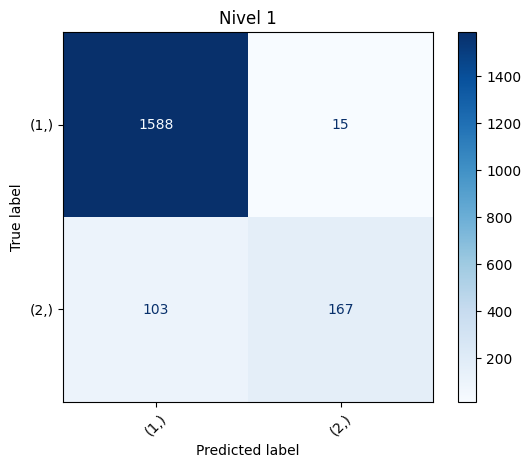


Matriz de Confusión para el Nivel 2:
[[1522    0    0   13]
 [  28   19    0    1]
 [   7    0   12    1]
 [ 102    0    1  167]]


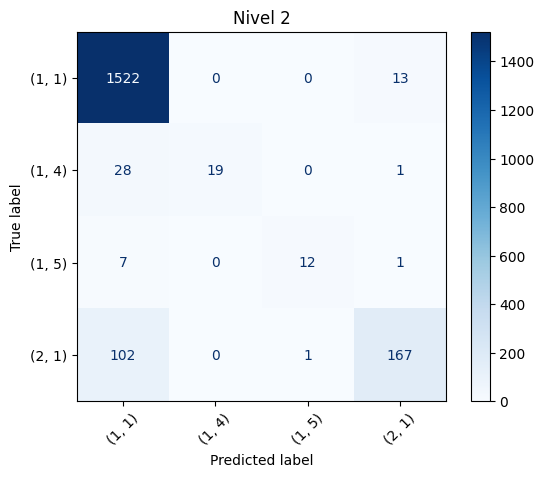


Matriz de Confusión para el Nivel 3:
[[  0  99 244   0   0   0   1]
 [  0 363  62   0   0   0   3]
 [  0  14 740   0   0   0   9]
 [  0  12  16  19   0   0   1]
 [  0   0   7   0  12   0   1]
 [  0   4  20   0   0   0  84]
 [  0  27  51   0   1   0  83]]


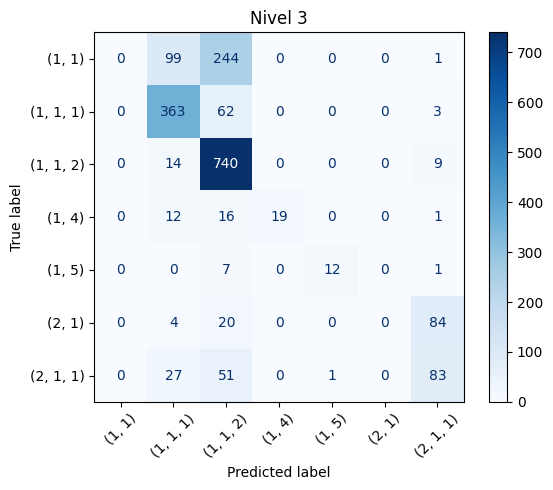


Matriz de Confusión para el Nivel 4:
[[  0  99 244   0   0   0   1   0   0   0   0]
 [  0 363  62   0   0   0   3   0   0   0   0]
 [  0  14 740   0   0   0   6   0   2   1   0]
 [  0  12  16  19   0   0   0   0   1   0   0]
 [  0   0   7   0  12   0   0   0   0   1   0]
 [  0   4  20   0   0   0  69   0   5   6   4]
 [  0   4   3   0   0   0  29   0   0   0   0]
 [  0   1   5   0   0   0   0   0   0   0   1]
 [  0   4  19   0   0   0   2   0   6   0   1]
 [  0   4   2   0   0   0   1   0   3   4   1]
 [  0  14  22   0   1   0   2   0   0   1  32]]


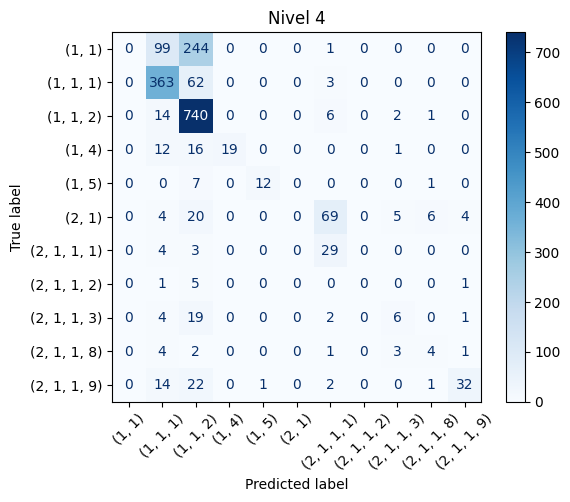

In [ ]:
import numpy as np
from collections import Counter
from itertools import product
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def hierarchical_confusion_matrix_per_level(y_true, y_pred):
    # Crear un conjunto único de clases jerárquicas por nivel
    max_length = max(len(label) for label in y_true + y_pred)

    # Inicializar la lista de matrices de confusión para cada nivel
    confusion_matrices_by_level = []

    # Iterar sobre cada nivel de la jerarquía
    for level in range(max_length):
        # Obtener las clases en el nivel actual
        true_at_level = [tuple(label[:level+1]) for label in y_true]
        pred_at_level = [tuple(label[:level+1]) for label in y_pred]

        # Crear un conjunto único de clases a ese nivel
        unique_classes = {cls for cls in true_at_level + pred_at_level}

        # Mapear las clases a índices
        class_to_index = {cls: idx for idx, cls in enumerate(sorted(unique_classes))}

        # Inicializar la matriz de confusión para el nivel
        n_classes = len(unique_classes)
        confusion_matrix_level = np.zeros((n_classes, n_classes), dtype=int)

        # Construir la matriz de confusión para el nivel
        for true_label, pred_label in zip(true_at_level, pred_at_level):
            true_index = class_to_index[true_label]
            pred_index = class_to_index[pred_label]
            confusion_matrix_level[true_index, pred_index] += 1

        # Agregar la matriz de confusión del nivel actual a la lista
        confusion_matrices_by_level.append((confusion_matrix_level, class_to_index))

    return confusion_matrices_by_level

confusion_matrices_by_level = hierarchical_confusion_matrix_per_level(y_test_list, predictions_list)

# Mostrar las matrices de confusión por nivel
for level, (conf_matrix, class_to_index) in enumerate(confusion_matrices_by_level):
    print(f"\nMatriz de Confusión para el Nivel {level+1}:")
    print(conf_matrix)

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(class_to_index.keys()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Nivel {level+1}")
    plt.xticks(rotation=45)
    plt.show()


### Clasificador Local por Nodo Padre

In [ ]:
from hiclass import LocalClassifierPerParentNode
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

classifier = LocalClassifierPerParentNode(local_classifier=rf)

classifier.fit(X_train, y_train_hierarchical)
predictions = classifier.predict(X_test)

In [ ]:
df = get_metrics(y_test_hierarchical, predictions)
print(df)

       f1_score  precision    recall
micro  0.920382   0.891515  0.951180
macro  0.919612   0.907457  0.967788


In [ ]:
# Convertimos los datos a listas para poder trabajar mejor con las funciones de numpy
y_test_list = y_test_hierarchical.tolist()
predictions_list = [list(map(int, filter(None, row))) for row in predictions]


Matriz de Confusión para el Nivel 1:
[[1586   17]
 [  96  174]]


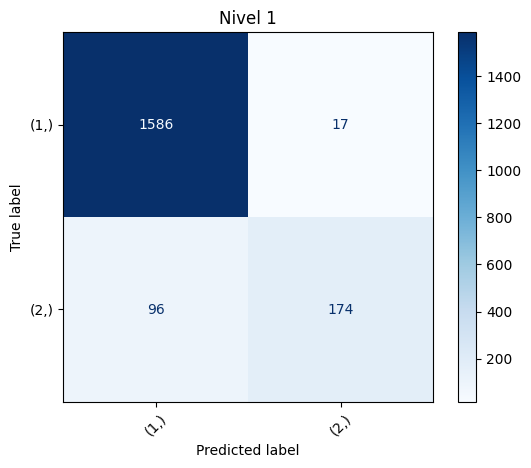


Matriz de Confusión para el Nivel 2:
[[1519    0    0   16]
 [  28   20    0    0]
 [   7    0   12    1]
 [  96    0    0  174]]


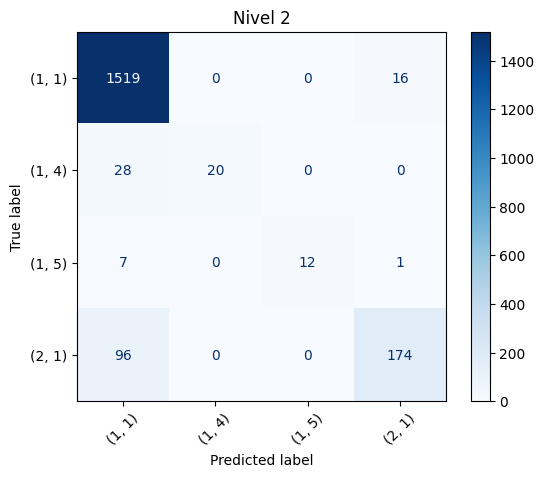


Matriz de Confusión para el Nivel 3:
[[  0 106 235   0   0   0   3]
 [  0 364  62   0   0   0   2]
 [  0  17 735   0   0   0  11]
 [  0  11  17  20   0   0   0]
 [  0   0   7   0  12   0   1]
 [  0   3  20   0   0   0  85]
 [  0  23  50   0   0   0  89]]


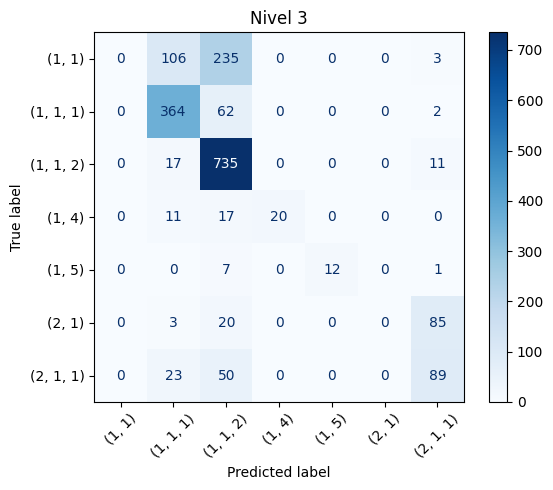


Matriz de Confusión para el Nivel 4:
[[  0 106 235   0   0   0   1   0   1   1   0]
 [  0 364  62   0   0   0   2   0   0   0   0]
 [  0  17 735   0   0   0   5   0   2   1   3]
 [  0  11  17  20   0   0   0   0   0   0   0]
 [  0   0   7   0  12   0   0   0   0   0   1]
 [  0   3  20   0   0   0  71   0   4   6   4]
 [  0   4   2   0   0   0  29   0   0   0   1]
 [  0   0   6   0   0   0   0   0   1   0   0]
 [  0   3  19   0   0   0   3   0   7   0   0]
 [  0   3   3   0   0   0   0   0   3   6   0]
 [  0  13  20   0   0   0   2   0   1   2  34]]


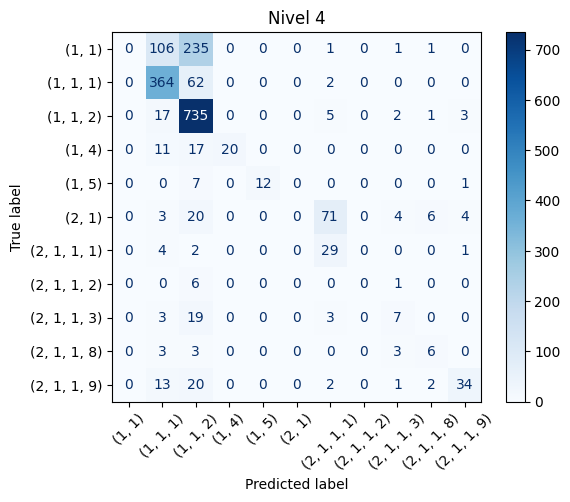

In [ ]:
confusion_matrices_by_level = hierarchical_confusion_matrix_per_level(y_test_list, predictions_list)

# Mostrar las matrices de confusión por nivel
for level, (conf_matrix, class_to_index) in enumerate(confusion_matrices_by_level):
    print(f"\nMatriz de Confusión para el Nivel {level+1}:")
    print(conf_matrix)

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(class_to_index.keys()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Nivel {level+1}")
    plt.xticks(rotation=45)
    plt.show()

### Clasificador Por Nivel

In [ ]:
from hiclass import LocalClassifierPerLevel
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

classifier = LocalClassifierPerLevel(local_classifier=rf)

classifier.fit(X_train, y_train_hierarchical)
predictions = classifier.predict(X_test)

In [ ]:
df = get_metrics(y_test_hierarchical, predictions)
print(df)

       f1_score  precision    recall
micro  0.917058   0.888687  0.947300
macro  0.916320   0.905143  0.965385


In [ ]:
# Convertimos los datos a listas para poder trabajar mejor con las funciones de numpy
y_test_list = y_test_hierarchical.tolist()
predictions_list = [list(map(int, filter(None, row))) for row in predictions]


Matriz de Confusión para el Nivel 1:
[[1588   15]
 [ 103  167]]


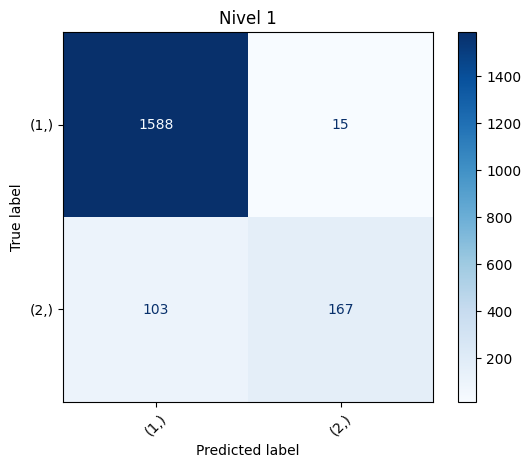


Matriz de Confusión para el Nivel 2:
[[1521    0    0   14]
 [  27   21    0    0]
 [   7    0   12    1]
 [ 102    0    1  167]]


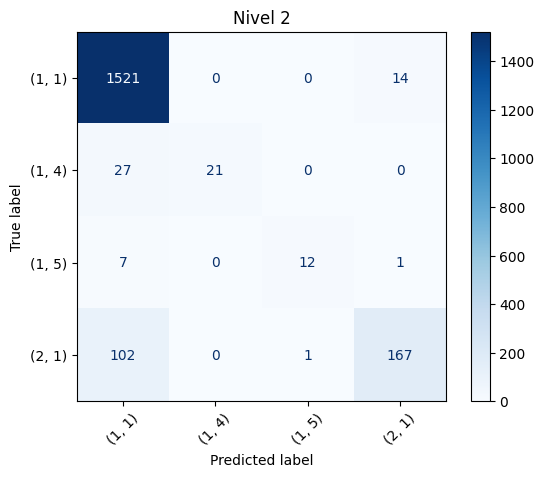


Matriz de Confusión para el Nivel 3:
[[  0  95 245   0   0   0   4]
 [  0 364  61   0   0   0   3]
 [  0  17 739   0   0   0   7]
 [  0  12  15  21   0   0   0]
 [  0   2   5   0  12   0   1]
 [  0   7  17   0   0   0  84]
 [  0  24  54   0   1   0  83]]


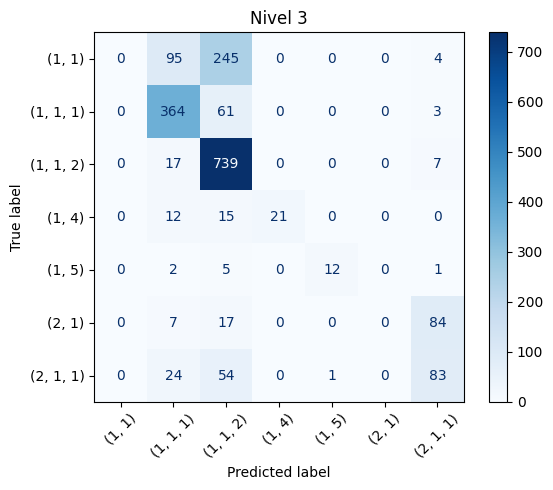


Matriz de Confusión para el Nivel 4:
[[  0  95 245   0   0   0   2   0   2   0   0]
 [  0 364  61   0   0   0   3   0   0   0   0]
 [  0  17 739   0   0   0   4   0   3   0   0]
 [  0  12  15  21   0   0   0   0   0   0   0]
 [  0   2   5   0  12   0   0   0   0   1   0]
 [  0   7  17   0   0   0  67   0   9   5   3]
 [  0   4   3   0   0   0  29   0   0   0   0]
 [  0   0   6   0   0   0   0   0   0   0   1]
 [  0   3  19   0   0   0   2   0   7   0   1]
 [  0   2   4   0   0   0   1   0   4   4   0]
 [  0  15  22   0   1   0   2   0   2   1  29]]


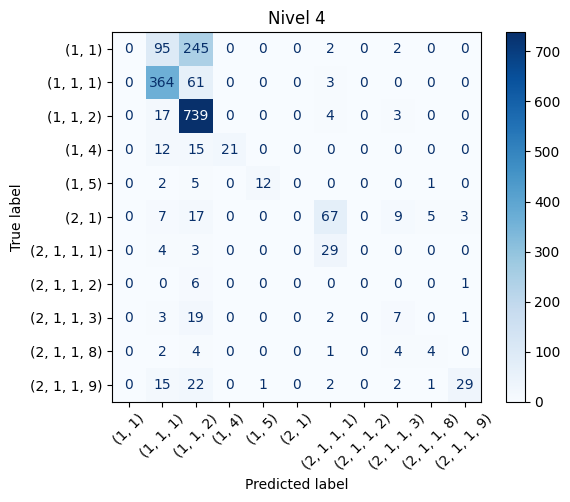

In [ ]:
confusion_matrices_by_level = hierarchical_confusion_matrix_per_level(y_test_list, predictions_list)

# Mostrar las matrices de confusión por nivel
for level, (conf_matrix, class_to_index) in enumerate(confusion_matrices_by_level):
    print(f"\nMatriz de Confusión para el Nivel {level+1}:")
    print(conf_matrix)

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(class_to_index.keys()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Nivel {level+1}")
    plt.xticks(rotation=45)
    plt.show()

### Conclusiones y resultados

| Algoritmo  | f1_score | precision | recall
|------------|----------|-----------|-------
| Local Per Node (micro) |0.920382 |   0.891515 | 0.951180
| Local Per Node (macro) |0.918954 | 0.906478 |  0.968233
| Local Per Parent Node (micro) |0.918310|   0.889900|  0.948594
| Local Per Parent Node (macro) |0.917441|   0.906389|  0.966186
| Local Per Level (micro) |0.918987  | 0.890033|  0.949887
| Local Per Level (macro) |0.918420  |  0.906211 |  0.967343


Se observan buenos resultados con los tres tipos de algoritmos de clasificación jerárquica, sin embargo, parece que para este tipo de problema el Local Por Nodo ofrece mejores resultados que los otros dos.

